In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [36]:
Q_amount = []
Q_uniques = []
Q_W_amount = []
Ws = {}
trash = 0
for i in range(8):
    Q_W_amount.append([])
    Q_uniques.append([])
P_amount = []
permutations_amount = []
for i in range(3, 11):
    data = pd.read_csv(f'results/results_{i}.csv', delimiter=';')
    permutations_amount.append(len(data["W"]))
#     experiment 1: count unique Q-tableaux
    Q = set(data["Q"])
    Q_amount.append(len(Q))
#     experiment 2: amount of perms for each Q
    Q_uniques[i-3], Q_W_amount[i-3] = np.unique(data["Q"], return_counts=True)
    '''
    Берем все уникальные Q, кидаем в словарь,
    в соответствие каждому Q записываем перестановку
    '''
    data = np.array(data)
    for q in Q_uniques[i-3]:
        w_temp = []
        for line in data:
            if line[3] == q:
                w_temp.append(line[3])
        Ws.update({q: w_temp})
    print('done' + str(i))

done3
done4
done5
done6
done7
done8


KeyboardInterrupt: 

In [4]:
Q_amount

[4, 10, 26, 76, 232, 764, 2620, 9496]

In [5]:
Q_W_amount[2]

array([1, 4, 4, 5, 6, 4, 5, 6, 5, 6, 5, 5, 4, 4, 5, 6, 5, 6, 5, 5, 4, 6,
       5, 4, 4, 1])

In [5]:
Ws

In [6]:
x = np.arange(3, 11, 1)
y = np.array(Q_amount)
labels = "Кол-во уникальных Q"

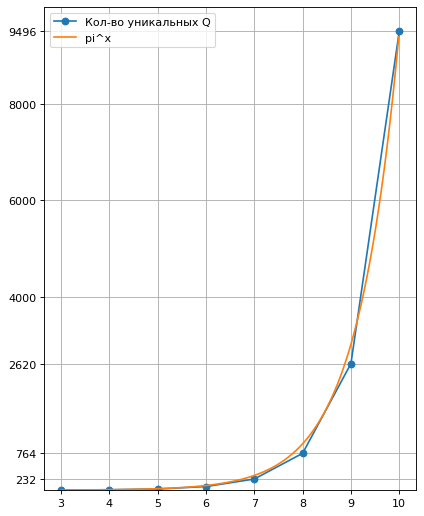

In [87]:
plt.figure(figsize=(6, 8), dpi=80)
plt.ylim(0, 10000)
plt.plot(x, y, 'o-', label=labels)
plt.legend(loc='upper left')
plt.grid(True)
x_1 = np.arange(3, 10, 0.01)
plt.plot(x_1, (math.pi ** (x_1 - 2)), '-', label='pi^x')
plt.legend(loc='upper left')
plt.yticks([y[-4], y[-3], y[-2], 4000, 6000, 8000, y[-1]])
plt.savefig("Q_tableaux.png", dpi=80)

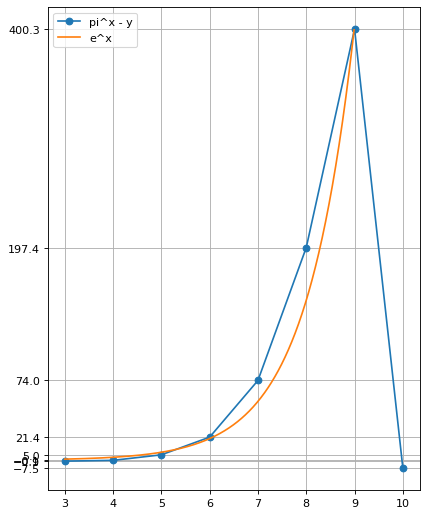

In [103]:
plt.figure(figsize=(6, 8), dpi=80)
plt.plot(x, math.pi ** (x - 2) - y, 'o-', label='pi^x - y')
plt.yticks(math.pi ** (x - 2) - y)
plt.legend(loc='upper left')
plt.grid(True)
x_2 = np.arange(3, 9, 0.01)
plt.plot(x_2, (math.e ** (x_2 - 3)), '-', label='e^x')
plt.legend(loc='upper left')

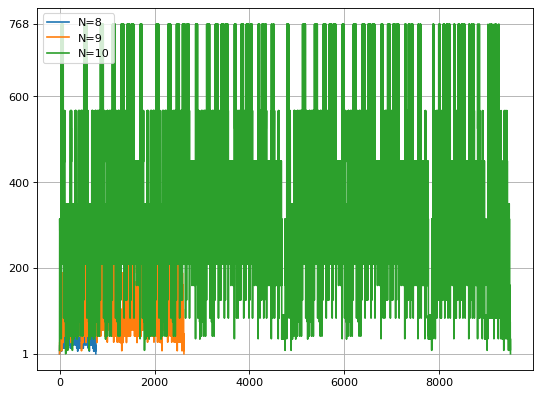

In [3]:
y = [Q_W_amount[i] for i in range(8)]
plt.figure(figsize=(8, 6), dpi=80)
for i in range(5, 8):
    x = np.array([i+1 for i in range(len(y[i]))])
    plt.yticks([max(y[i]), 1, 200, 400, 600, 900])
    plt.plot(x, y[i], '-', label=f'N={i+3}')
    plt.legend(loc='upper left')
plt.grid(True)
plt.savefig("Q_amounts_10.png", dpi=80)

In [11]:
# Experiment 3: how many Q-tableaux for each form
forms = {}
for i in range(8):
    for Q in Q_uniques[i]:
        # dictionary: Q-form <=> amount of repeats
        line = 0
        form = ''
        for x in Q:
            if x == ',':
                line += 1
            elif x == 'n':
                form += str(line)
                line = 0
        if form not in forms.keys():
            forms.update({form: 1})
        else:
            forms[form] += 1
forms

{'3': 1,
 '21': 2,
 '111': 1,
 '4': 1,
 '31': 3,
 '22': 2,
 '211': 3,
 '1111': 1,
 '5': 1,
 '41': 4,
 '32': 5,
 '311': 6,
 '221': 5,
 '2111': 4,
 '11111': 1,
 '6': 1,
 '51': 5,
 '42': 9,
 '411': 10,
 '33': 5,
 '321': 16,
 '3111': 10,
 '222': 5,
 '2211': 9,
 '21111': 5,
 '111111': 1,
 '7': 1,
 '61': 6,
 '52': 14,
 '511': 15,
 '43': 14,
 '421': 35,
 '4111': 20,
 '331': 21,
 '322': 21,
 '3211': 35,
 '31111': 15,
 '2221': 14,
 '22111': 14,
 '211111': 6,
 '1111111': 1,
 '8': 1,
 '71': 7,
 '62': 20,
 '611': 21,
 '53': 28,
 '521': 64,
 '5111': 35,
 '44': 14,
 '431': 70,
 '422': 56,
 '4211': 90,
 '41111': 35,
 '332': 42,
 '3311': 56,
 '3221': 70,
 '32111': 64,
 '311111': 21,
 '2222': 14,
 '22211': 28,
 '221111': 20,
 '2111111': 7,
 '11111111': 1,
 '9': 1,
 '81': 8,
 '72': 27,
 '711': 28,
 '63': 48,
 '621': 105,
 '6111': 56,
 '54': 42,
 '531': 162,
 '522': 120,
 '5211': 189,
 '51111': 70,
 '441': 84,
 '432': 168,
 '4311': 216,
 '4221': 216,
 '42111': 189,
 '411111': 56,
 '333': 42,
 '3321': 168

In [ ]:
'''
Для каждой формы Q вывести все перестановки,
у которых Q имеет взятую форму
'''
forms = {}
for i in range(8):
    for Q in Q_uniques[i]:



In [ ]:
y = [np.sort(Q_W_amount[i]) for i in range(8)]
plt.figure(figsize=(6, 8), dpi=80)
for i in range(5, 7):
    x = np.array([i+1 for i in range(len(y[i]))])
    plt.yticks(y[i])
    plt.plot(x, y[i], '-', label=f'N={i+3}')
    plt.legend(loc='upper left')
plt.grid(True)
plt.savefig("Q_amounts_8-9_sorted.png", dpi=80)